In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
#Does having a ticket shared by multiple passengers increase survival odds?
ticket_count = data["Ticket"].value_counts()
data["ticket_count"] = data["Ticket"].map(ticket_count)
data["ticket_count"] = (data["ticket_count"] > 1).astype(int)
data[["ticket_count","Ticket"]]

survival_odds = data.groupby("ticket_count")["Survived"].mean()*100
survival_odds


ticket_count
0    29.798903
1    52.034884
Name: Survived, dtype: float64

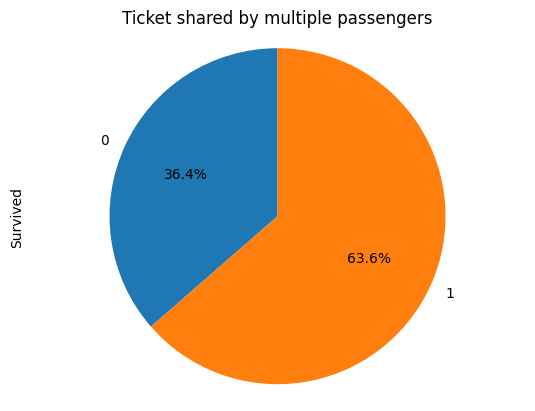

In [17]:
survival_odds.plot(kind="pie",autopct="%1.1f%%",startangle=90)
plt.title("Ticket shared by multiple passengers")
plt.axis("equal")
plt.show()

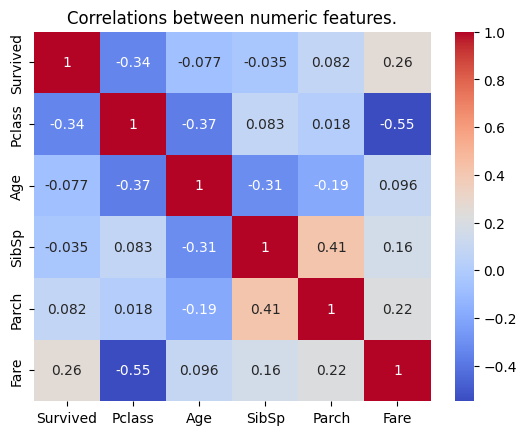

In [18]:
#Create a heatmap showing correlations between numeric features.

sns.heatmap(data[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr(),annot=True , cmap = "coolwarm")
plt.title("Correlations between numeric features.")
plt.show()

In [23]:
#Which title (Mr., Mrs., Miss, etc.) had the highest survival rate?

data["title"] = data["Name"].str.extract(r',\s*([^\.]*)\.', expand=False).str.strip()      #expand=False returns a Series instead of a DataFrame
survival_rate = data.groupby("title")["Survived"].mean().sort_values(ascending=False)*100    
print("The highest survival rate by title " ,survival_rate.head(5))

The highest survival rate is  title
Lady            100.0
Ms              100.0
Sir             100.0
Mme             100.0
the Countess    100.0
Name: Survived, dtype: float64


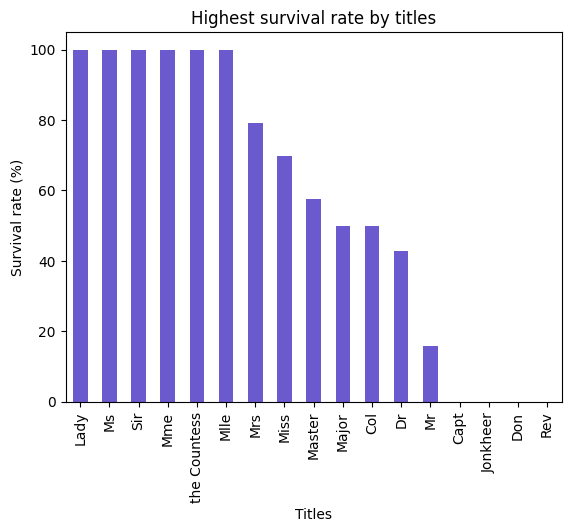

In [28]:
survival_rate.plot(kind="bar",color="slateblue")
plt.title("Highest survival rate by titles")
plt.ylabel("Survival rate (%)")
plt.xlabel("Titles")
plt.show()

In [36]:
#Did survival rate differ across deck levels (from Cabin column)?
data["deck"] = data["Cabin"].dropna().astype(str).str[0]
deck_survival = data.groupby("deck")["Survived"].mean().sort_values(ascending=False)*100
deck_survival

deck
D    75.757576
E    75.000000
B    74.468085
F    61.538462
C    59.322034
G    50.000000
A    46.666667
T     0.000000
Name: Survived, dtype: float64

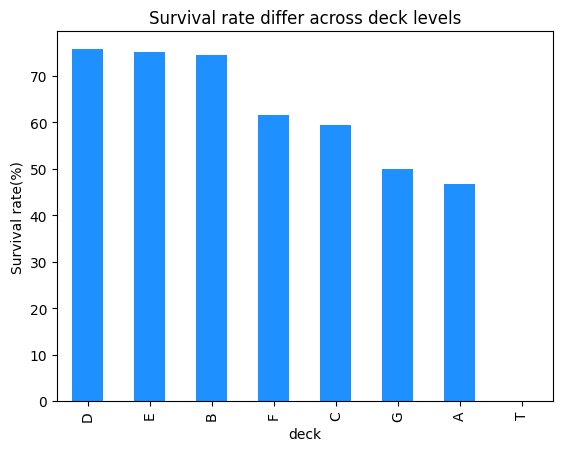

In [38]:
deck_survival.plot(kind="bar" , color="dodgerblue")
plt.title("Survival rate differ across deck levels")
plt.ylabel("Survival rate(%)")
plt.show()

In [41]:
#What is the survival distribution for males vs. females by class?
pivot_table = data.pivot_table(index="Sex",columns="Pclass",values="Survived" , aggfunc="mean")*100
pivot_table

Pclass,1,2,3
Sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


<Figure size 800x500 with 0 Axes>

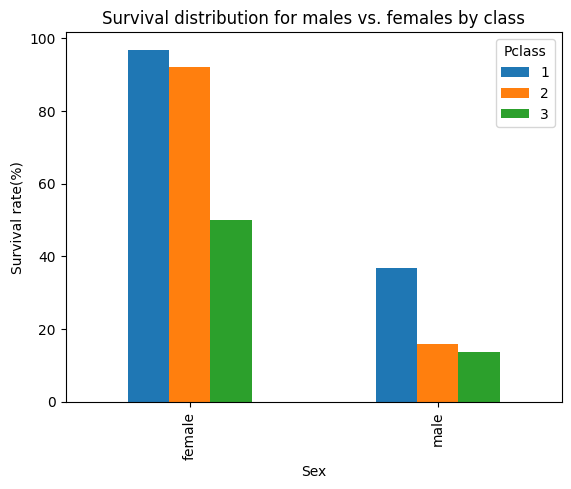

In [44]:
plt.figure(figsize=(8,5))
pivot_table.plot(kind="bar")
plt.title("Survival distribution for males vs. females by class")
plt.ylabel("Survival rate(%)")
plt.show()

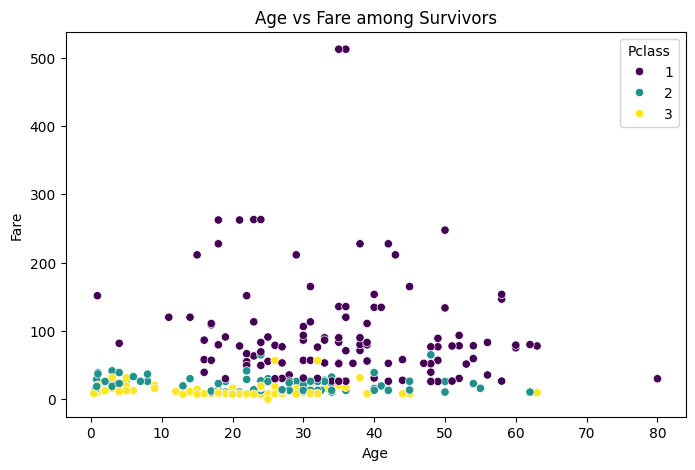

In [55]:
#Is there a relationship between age and fare for survivors?

survivors = data[data["Survived"] == 1]
plt.figure(figsize=(8,5))
sns.scatterplot(data=survivors,x="Age",y="Fare",hue="Pclass",palette="viridis")
plt.title("Age vs Fare among Survivors")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()